<a href="https://colab.research.google.com/github/GermanOmar/GPs---WAAM/blob/master/WAAM_AM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Layer geometry prediction in wire arc additive manufacturing: A supervised machine learning approach 


<a href="https://ibb.co/5Rvr5t7"><img src="https://i.ibb.co/kS04hkd/Fig1-4.png" WIDTH="500" HEIGHT="300"  border="0"></a>

 Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing

 Upload database:

In [2]:
!git clone https://github.com/GermanOmar/GPs---WAAM

Cloning into 'GPs---WAAM'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [3]:
#Experimental data
data = pd.read_table('df2.txt') 
data.describe()



,C,V,Q*,PGFR,LH,WW
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,146.642000,22.956800,1.421360,2.20560,1.653200,7.452800
std,33.819996,1.158946,0.351795,1.48724,0.215672,0.994793
min,100.000000,21.030000,0.889000,0.80000,1.290000,5.800000
25%,123.000000,22.130000,1.207000,0.80000,1.510000,6.700000
50%,141.010000,23.180000,1.343000,1.70000,1.620000,7.350000
75%,161.140000,23.840000,1.552000,3.16000,1.810000,8.000000
max,228.800000,24.760000,2.298000,5.00000,2.070000,9.500000


<a href="https://ibb.co/QrLn5c3"><img src="https://i.ibb.co/XS1pw4r/FIG1-geo.png" WIDTH="500" HEIGHT="325"  border="0"></a>


Setting inputs - output:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


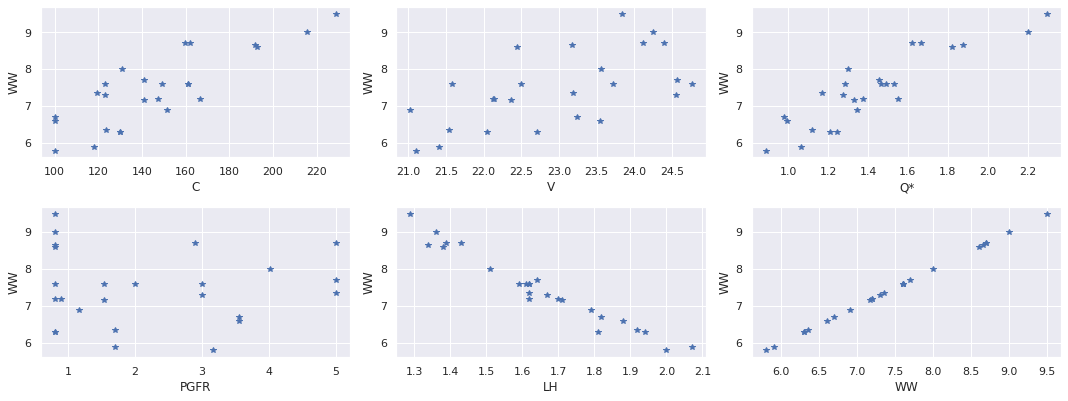

In [4]:
fields = ['C', 'V','Q*','PGFR','LH','WW']
import seaborn as sns
sns.set()

fig = plt.figure()
fig.set_size_inches((15,8))
for i, field in enumerate(fields):
  plt.subplot(3, 3, i + 1)
  plt.plot(data[field], data['WW'], 'b*')
  plt.xlabel(field)
  plt.ylabel('WW')

plt.tight_layout()

X=data[['C', 'V','Q*','PGFR']]
Y=data['WW'][:,None]
Z=data['LH'][:,None]


#fig.tight_layout()

NameError: ignored

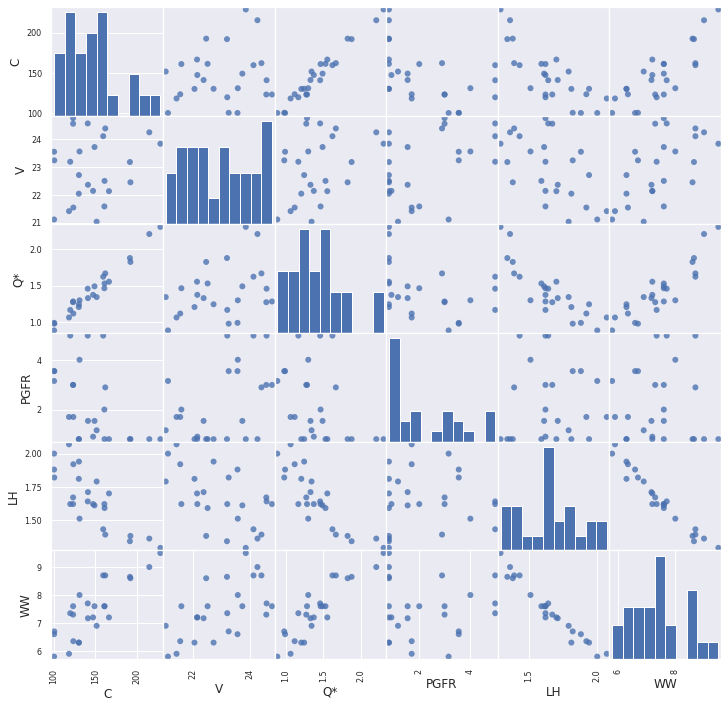

In [5]:
from pandas.plotting import scatter_matrix
#DISPLAY MATRIX - identificar correlacion entre variables
scatter_matrix(data, alpha=0.8, marker='o', figsize = (12,12))
warnings.filterwarnings("ignore")

#Wall width prediction

In [6]:
def normalize(X, X_mu, X_std):
  return (X - X_mu)/X_std

def denormalize(Xn, X_mu, X_std):
  return Xn*X_std + X_mu

X_std = X.std(0)
X_mu = X.mean(0)
Xn = normalize(X, X_mu, X_std)

Y_std = Y.std(0)
Y_mu = Y.mean(0)
Yn = normalize(Y, Y_mu, Y_std)

 Split data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.22, random_state=32)
print('training samples:', X_train.shape[0],  ' test samples:', X_test.shape[0])

training samples: 19  test samples: 6


In [8]:
pip install lazypredict

In [9]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


#Results:

In [10]:
from sklearn.metrics import mean_absolute_error as MAE
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 79%|███████▉  | 31/39 [00:00<00:00, 33.02it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
[03:57:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 39/39 [00:01<00:00, 21.17it/s]

                               R-Squared  RMSE  Time Taken
Model                                                     
XGBRegressor                        0.93  0.19        0.94
GradientBoostingRegressor           0.87  0.26        0.02
SGDRegressor                        0.87  0.27        0.01
LinearSVR                           0.85  0.28        0.01
PassiveAggressiveRegressor          0.81  0.32        0.01
AdaBoostRegressor                   0.79  0.33        0.06
Ridge                               0.79  0.33        0.01
DecisionTreeRegressor               0.79  0.34        0.01
BayesianRidge                       0.78  0.34        0.03
ElasticNetCV                        0.78  0.34        0.08
RidgeCV                             0.78  0.34        0.01
LassoCV                             0.77  0.35        0.08
ExtraTreesRegressor                 0.73  0.37        0.09
LassoLarsIC                         0.72  0.38        0.01
HuberRegressor                      0.72  0.38        0.

#GBR 

In [13]:
from sklearn.ensemble import GradientBoostingRegressor
#KERNEL
#GBR=GradientBoostingRegressor(n_estimators=100, random_state=0)
GBR=GradientBoostingRegressor(n_estimators=100, random_state=32, learning_rate=0.1, )

#START TRAINING
GBR.fit(X_train,y_train)
#PREDICTION
y_pred=GBR.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

 
print("-Gradient boosting regressor-")
print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()
"""
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""

-Gradient boosting regressor-
-----------------------------
MSE test: 0.05956374074163193

R2:  0.8873794817910321
RMSE:  0.24405683916176563
MAE:  0.20991875048319356
IM:  0.341046922970599



"\nRE=100 * abs(y_test - y_pred) / y_test\nprint('Relative error (%): ',RE)\n"

Text(0.5, 1.0, 'Gradient boosting regressor')

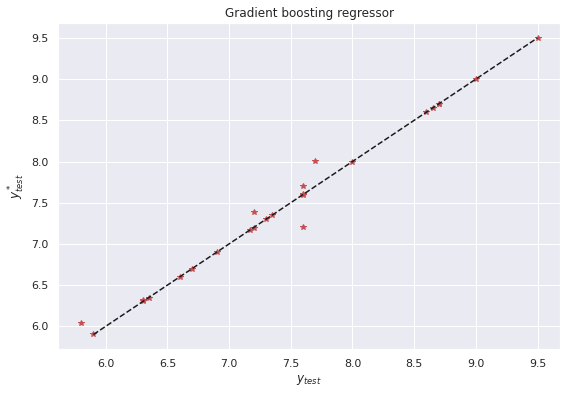

In [14]:
#Plots
y_hat=GBR.predict(X)

fig = plt.figure()
fig.set_size_inches((9,6))

plt.plot(Y, y_hat, 'r*')
plt.plot([y_hat.min(), y_hat.max()], [y_hat.min(), y_hat.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
plt.title('Gradient boosting regressor') 



# GPs

Gaussian Process
MSE train: 0.010222810207170604
MSE test: 0.3298577823318874
MSE train < MSE test? True

R2_train:  0.9898774951236978
R2_test:  0.3763193191203811

R2:  0.3763193191203811
RMSE:  0.5743324667227924
MAE:  0.4252363225411145
IM:  0.9485047728096275



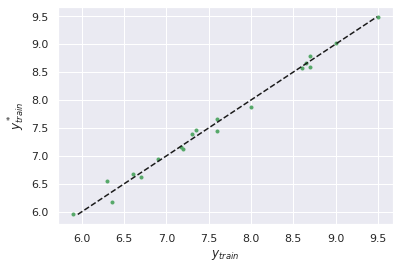

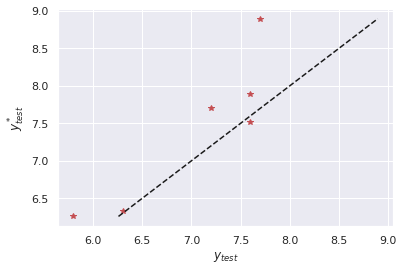

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
 
model=GPR(kernel=kernel, n_restarts_optimizer=9, alpha=0.01, normalize_y=True)
 
#Training
model.fit(X_train,y_train)
 
#Testing
y_star_train = model.predict(X_train)
y_pred = model.predict(X_test)
 
#Plots
plt.figure()
plt.plot(y_train, y_star_train, 'g.')
plt.plot([y_star_train.min(), y_star_train.max()], [y_star_train.min(), y_star_train.max()], 'k--')
plt.ylabel('$y^*_{train}$')
plt.xlabel('$y_{train}$')

plt.figure()
plt.plot(y_test, y_pred, 'r*')
plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
 
from sklearn.metrics import mean_squared_error
MSE_test = mean_squared_error(y_test, y_pred)
MSE_train = mean_squared_error(y_train, y_star_train)
 
print("Gaussian Process")
print('MSE train:', MSE_train)
print('MSE test:', MSE_test)
print("MSE train < MSE test?", MSE_train < MSE_test)
print()
from sklearn.metrics import r2_score
R2_train=r2_score(y_train, y_star_train)
print('R2_train: ',R2_train)
R2_test=r2_score(y_test, y_pred)
print('R2_test: ',R2_test)
print()
""" 
RE=100 * abs(y_test - y_pred) / y_test
print('Relative error (%): ',RE)
"""
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 
#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

# SGD

In [16]:
from sklearn.linear_model import SGDRegressor

print("-SGD regressor-")
#KERNEL
#SGD=SGDRegressor(random_state=32, max_iter=1000, tol=1e-3, loss='squared_loss', penalty='l2')
from sklearn.ensemble import RandomForestRegressor
#KERNEL
SGD=RandomForestRegressor(n_estimators=500,max_depth=10)


#START TRAINING
SGD.fit(X_train,y_train)
#PREDICTION
y_pred=SGD.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print("-----------------------------")

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-SGD regressor-
-----------------------------
MSE test: 0.12934653713332997

R2:  0.7554372197058887
RMSE:  0.35964779595227603
MAE:  0.2898966666666589
IM:  0.5226830473460524



# XGB

In [17]:
import pickle
import xgboost as xgb

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

In [18]:
print(xgbr)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [19]:
score = xgbr.score(X_test, y_test)  
print("Training score: ", score)

Training score:  0.9309821136997968


In [20]:
print("-XGBRegressor -")
print("------------------")

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

-XGBRegressor -
------------------
MSE test: 0.03650279319877423

R2:  0.9309821136997967
RMSE:  0.19105704174087443
MAE:  0.1680325667063395
IM:  0.2636308125049924



# AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostRegressor

print(" AdaBoost -")
print("------------------")

Ada = AdaBoostRegressor(random_state=32, n_estimators=100)
#START TRAINING
Ada.fit(X_train,y_train)
#PREDICTION
y_pred=Ada.predict(X_test)

#EVAL
from sklearn.metrics import mean_squared_error as MSE
MSE_test = MSE(y_test, y_pred)

print('MSE test:', MSE_test)

print()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE 

#METRICS: R2, RMSE, MAE
R2=r2_score(y_test, y_pred)
print('R2: ',R2)
RMSE = np.sqrt(MSE_test)
print("RMSE: ", RMSE)
MAE = MAE(y_test, y_pred)
print("MAE: ", MAE)
IM=np.sqrt(((1-R2)**2) + (RMSE**2) + (MAE**2) )
print("IM: ", IM)
print()

 AdaBoost -
------------------
MSE test: 0.10670714285714276

R2:  0.7982427971188477
RMSE:  0.3266605927520838
MAE:  0.2411904761904761
IM:  0.4534158770671334



## Comparisson

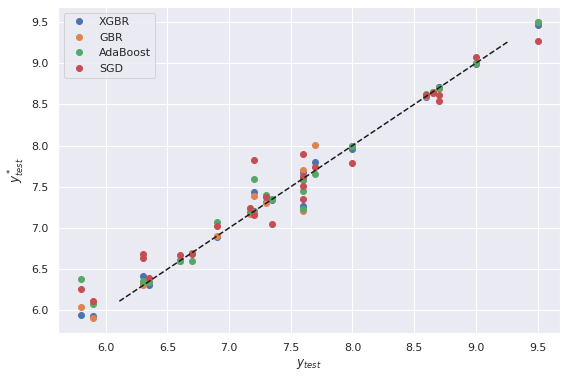

In [24]:
models = [ xgbr, GBR, Ada, SGD]
labels = ['XGBR', 'GBR', 'AdaBoost', 'SGD']

fig = plt.figure()
fig.set_size_inches((9,6))

for mod, label in zip( models, labels): 
  y_pred = mod.predict(X)
  plt.plot(Y, y_pred, 'o' ,label = label)

plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--')
plt.ylabel('$y^*_{test}$')
plt.xlabel('$y_{test}$')
plt.legend()  
  